In [6]:
# --- Cell 1: Import Libraries & Theme Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Seaborn theme & IBM colors
sns.set_theme(style="whitegrid")
IBM_COLORS = ["#052F61", "#4178BE", "#7CC7FF", "#264A60", "#AEAEAE"]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [7]:
# CODE CELL [2]
df = pd.read_csv('C:/Users/sayan/OneDrive/Desktop/PROJECTS/Unified Mentor/IBM HR Analytics/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Ordinal mappings
ordinal_maps = {
    "Education": {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"},
    "EnvironmentSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobInvolvement": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "PerformanceRating": {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"},
    "RelationshipSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "WorkLifeBalance": {1: "Bad", 2: "Good", 3: "Better", 4: "Best"},
}

for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [8]:
# --- Cell 3: Quick Overview & KPIs ---
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("\n--- Attrition Overview ---")
print(df['Attrition'].value_counts(normalize=True)*100)

print("\nAverage Years at Company:", df['YearsAtCompany'].mean())
print("Average Monthly Income:", df['MonthlyIncome'].mean())


Shape of dataset: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

--- Attrition Overview ---
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

Average Years at Company: 7.0081632653061225
Average Monthly Income: 6502.931292517007


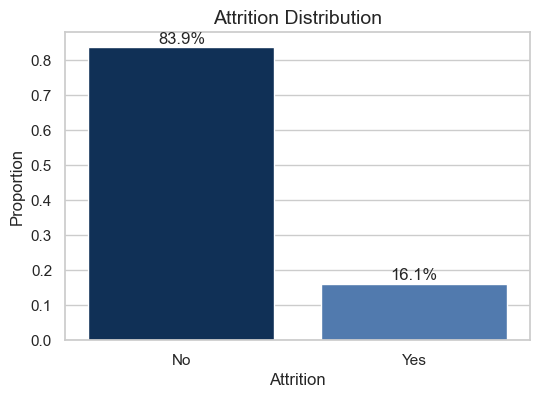

In [9]:
# --- Cell 4: Attrition Rate Visualization ---
attrition_rate = df['Attrition'].value_counts(normalize=True)
plt.figure(figsize=(6,4))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=IBM_COLORS)
plt.title("Attrition Distribution")
plt.ylabel("Proportion")
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v + 0.01, f"{v*100:.1f}%", ha='center')
plt.show()


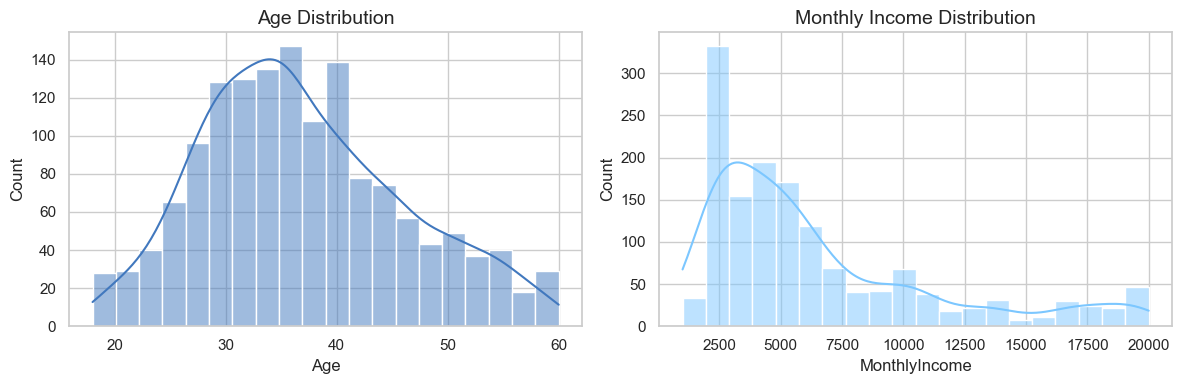

In [10]:
# --- Cell 5: Age & Income Distributions ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color=IBM_COLORS[1])
axes[0].set_title("Age Distribution")
sns.histplot(df['MonthlyIncome'], bins=20, kde=True, ax=axes[1], color=IBM_COLORS[2])
axes[1].set_title("Monthly Income Distribution")
plt.tight_layout()
plt.show()

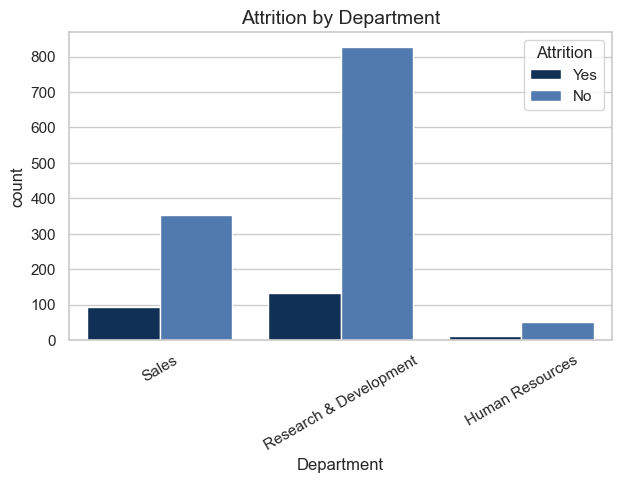

In [11]:
# --- Cell 6: Department vs Attrition ---
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Department', hue='Attrition', palette=IBM_COLORS)
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()

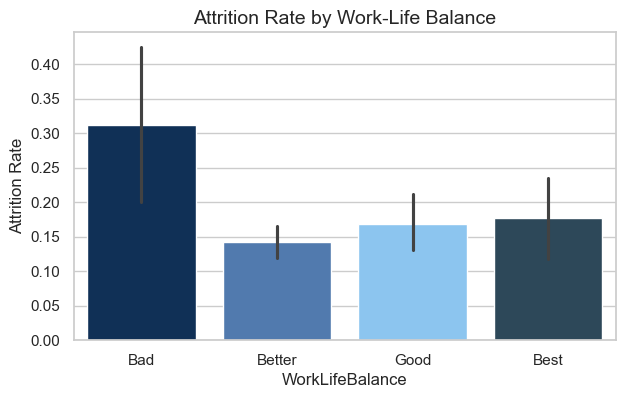

In [12]:
# --- Cell 7: Attrition Rate by Work-Life Balance ---
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='WorkLifeBalance', y=(df['Attrition']=='Yes'), estimator=np.mean, palette=IBM_COLORS)
plt.title("Attrition Rate by Work-Life Balance")
plt.ylabel("Attrition Rate")
plt.show()


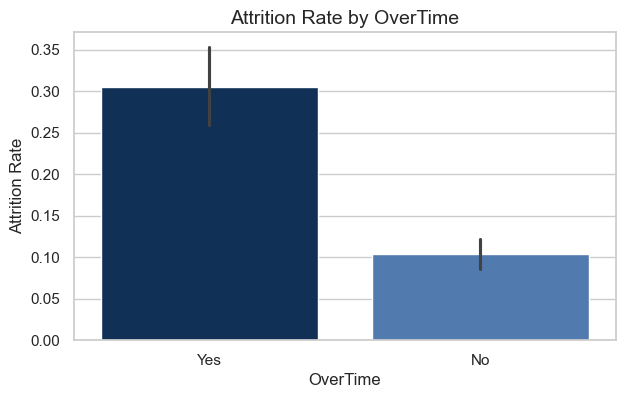

In [13]:
# --- Cell 8: Attrition Rate by OverTime ---
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='OverTime', y=(df['Attrition']=='Yes'), estimator=np.mean, palette=IBM_COLORS)
plt.title("Attrition Rate by OverTime")
plt.ylabel("Attrition Rate")
plt.show()

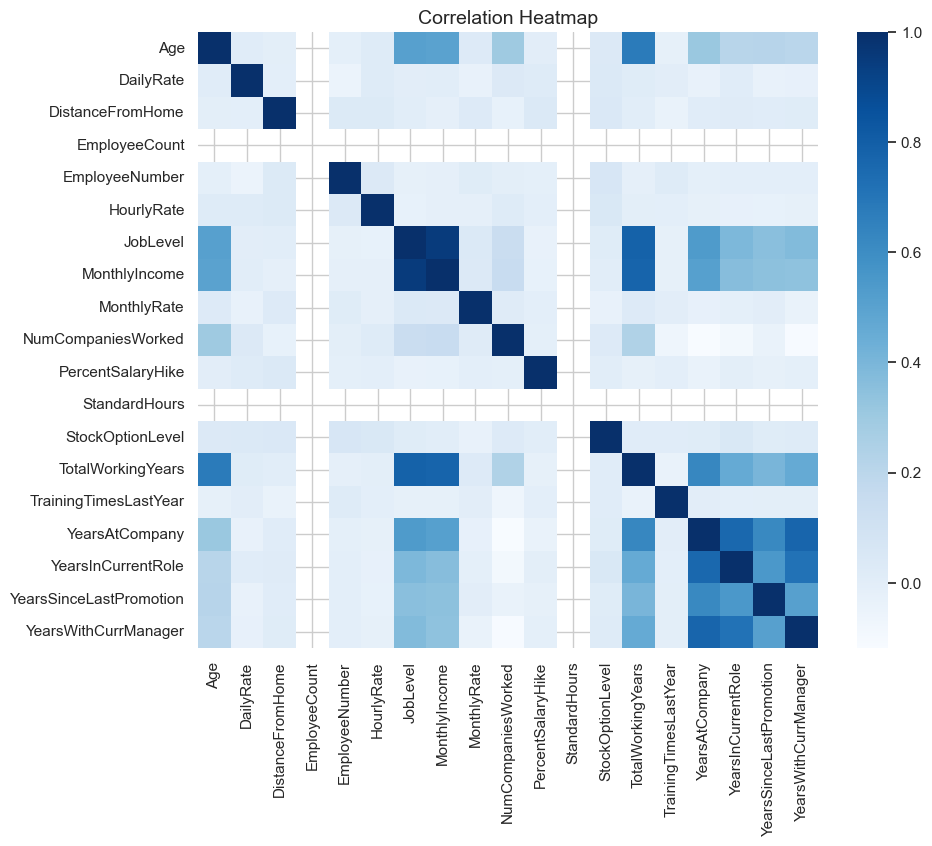

In [14]:
# --- Cell 9: Correlation Heatmap ---
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="Blues", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# --- Cell 10: Save Insight Tables ---
summary_by_dept = df.groupby(['Department', 'JobRole']).agg(
    TotalEmployees=('Attrition','count'),
    AttritionCount=('Attrition', lambda x: (x=='Yes').sum()),
    AttritionRate=('Attrition', lambda x: (x=='Yes').mean()*100),
    AvgIncome=('MonthlyIncome', 'mean')
).reset_index()

summary_by_dept.to_csv("Department_Attrition_Summary.csv", index=False)
print("Saved: Department_Attrition_Summary.csv")


Saved: Department_Attrition_Summary.csv
